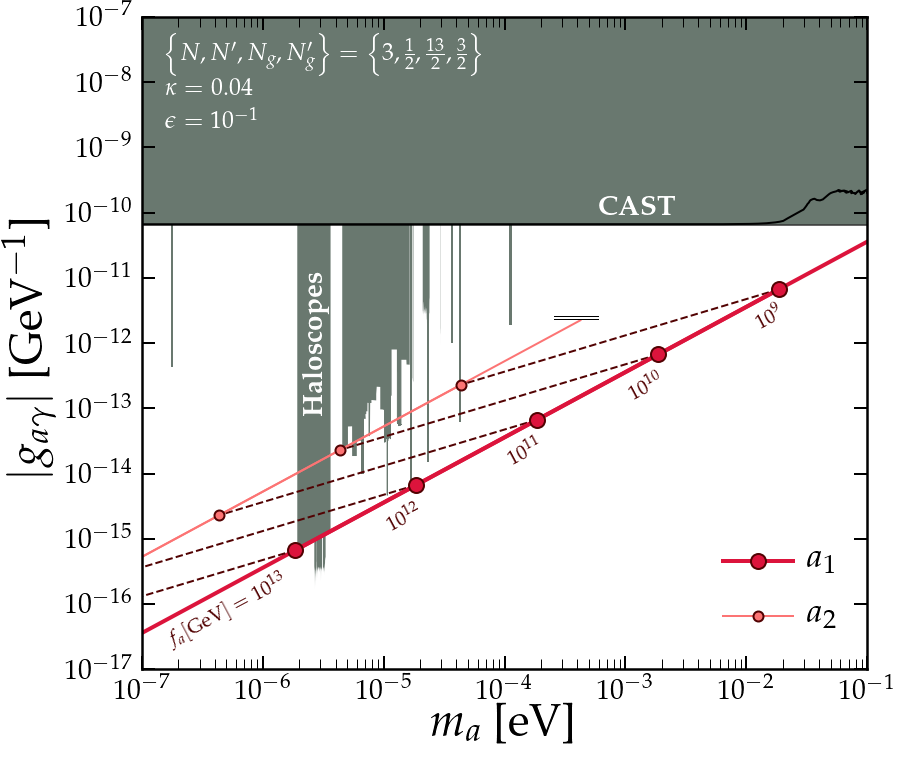

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from PlotFuncs import *
from AxionFuncs import *

AnomalyCoefficients = [3,0.5,13/2,3/2]
k = 0.04
eps = 0.1



fig,ax = MySquarePlot(r'$m_a$ [eV]','$|g_{a\gamma}|$ [GeV$^{-1}$]',tfs=28)
AxionPhoton.Helioscopes(ax,text_on=False,col='#69786f')
AxionPhoton.HaloscopesUniform(ax,text_on=False,col='#69786f')
AxionPhoton.HorizontalBranch(ax,text_on=False,col='#69786f')

col1 = 'crimson'
col2 = '#fc7474'
edgecol = '#520202'

fvals = 10.0**array([13,12,11,10,9])

m1,m2,g1,g2 = Couplings(fvals,eps,k,AnomalyCoefficients)

plt.plot(m1,g1,'o-',lw=4,color=col1,zorder=2,mec=edgecol,ms=15,mfc=col1,mew=2,label='$a_1$')
plt.plot(m2,g2,'o-',lw=2,color=col2,zorder=2,mec=edgecol,ms=10,mfc=col2,mew=2,label='$a_2$')
plt.plot([m1,m2],[g1,g2],'--',zorder=1.9,color=edgecol,lw=2)


fvals_fine = logspace(log10(3.4e7*3),15,100)

mf1,mf2,gf1,gf2 = Couplings(fvals_fine,eps,k,AnomalyCoefficients)

plt.plot(mf1,gf1,color=col1,lw=4,zorder=1,solid_capstyle='round')
plt.plot(mf2,gf2,color=col2,lw=2,zorder=1,solid_capstyle='round')

plt.plot([amax(mf2)*(1-0.4),amax(mf2)*(1+0.4)],[amax(gf2)*(1+0.03),amax(gf2)*(1+0.03)],'k-',lw=1)
plt.plot([amax(mf2)*(1-0.4),amax(mf2)*(1+0.4)],[amax(gf2)*(1+0.16),amax(gf2)*(1+0.16)],'k-',lw=1)



fs = 20
plt.text(m1[0]/1.2,g1[0]/4,r'$f_a {\rm [GeV]} = 10^{13}$',color=edgecol,fontsize=fs,rotation=28,ha='right',rotation_mode='anchor')
plt.text(m1[1]/1.8,g1[1]/5,r'$10^{12}$',color=edgecol,fontsize=fs,rotation=28)
plt.text(m1[2]/1.8,g1[2]/5,r'$10^{11}$',color=edgecol,fontsize=fs,rotation=28)
plt.text(m1[3]/1.8,g1[3]/5,r'$10^{10}$',color=edgecol,fontsize=fs,rotation=28)
plt.text(m1[4]/1.6,g1[4]/4,r'$10^{9}$',color=edgecol,fontsize=fs,rotation=28)


plt.text(6e-4,0.9e-10,r'{\bf CAST}',color='w')
plt.text(2.1e-6,1e-13,r'{\bf Haloscopes}',rotation=90,color='w')


sp = 0.03
fs = 24
yt = 0.82
plt.gcf().text(0.15,yt-2.3*sp,r'$\epsilon= 10^{-1}$',color='w',fontsize=fs)
plt.gcf().text(0.15,yt-sp,r'$\kappa = 0.04$',color='w',fontsize=fs)
plt.gcf().text(0.15,yt,r'$\left\{N,N^\prime,N_g,N^\prime_g\right\} = \left\{3,\frac{1}{2},\frac{13}{2},\frac{3}{2}\right\}$',color='w',fontsize=fs)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-7,1e-1])
ax.set_ylim([1e-17,1e-7])
ax.set_yticks(10.0**arange(-17,-6));

plt.legend(frameon=False,loc='lower right',fontsize=35,handletextpad=0.4)


MySaveFig(fig,'Couplings')

In [14]:

K_QCD = 1.69e-5 # GeV^4

def m2m1_ratio_hierarchical(f,N0,N1,N2):
    eps = 1e-6
    m1 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)+(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
    m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
    return (1/eps)*m2/m1

def m1m2_ratio_hierarchical(f,N0,N1,N2):
    eps = 1e6
    m1 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)+(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
    m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
    return (1/eps)*m1/m2

def Parameters(f,eps,k=0.04,AnomalyCoefficients=[3,0.5,13/2,3/2]):
    '''
    Input:
    f and f' in GeV, must be the same size
    N's are O(1) numbers

    Output:
    dm_sq = squared mass difference [eV^2]
    m1 = heavier mass [eV]
    m2 = lighter mass [eV]
    tan_2alpha = mixing angle
    '''
    fp = f/eps

    N,Np,Ng,Ngp = AnomalyCoefficients[:]
    N0 = N**2+k*Ng**2
    N1 = Np**2 + k*Ngp**2
    N2 = N*Np + k*Ng*Ngp


    dm_sq = (1e9**2)*(2*K_QCD/f**2)*(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5
    m1 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)+(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))
    m2 = 1e9*sqrt(K_QCD/f**2*((N0+N1*eps**2)-(4*N2**2*eps**2 + (N0-N1*eps**2)**2)**0.5))

    m2_small1 = m1*eps*m2m1_ratio_hierarchical(f,N0,N1,N2)
    m2_small2 = (1/eps)*m1/(m1m2_ratio_hierarchical(f,N0,N1,N2))

    m2[f/fp<=1e-6] = m2_small1[f/fp<=1e-6]
    m2[fp/f<=1e-6] = m2_small2[fp/f<=1e-6]

    tan_2alpha = 2*eps*(N*Np+k*Ng*Ngp)/((N**2+k*Ng**2)-eps**2*(Np**2+k*Ngp**2))
    return dm_sq,m1,m2,tan_2alpha


def Couplings(f,eps,k=0.04,AnomalyCoefficients=[3,0.5,13/2,3/2]):
    N,Np,Ng,Ngp = AnomalyCoefficients[:]

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps,k,AnomalyCoefficients)
    alph = arctan(tan_2alpha)/2
    fp = f/eps
    g1 = (1/137)*(1/(2*pi))*1.92*(N*cos(alph)/f-Np*sin(alph)/fp)
    g2 = ((1/137)*(1/(2*pi))*1.92*(N*sin(alph)/f+Np*cos(alph)/fp))
    return m1,m2,g1,g2


m1,m2,g1,g2 = Couplings(fvals,eps,k,AnomalyCoefficients)
g1/m1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


array([3.83656396e-10, 3.83656396e-10, 3.83656396e-10, 3.83656396e-10,
       3.83656396e-10])

In [3]:
75**4

31640625

In [13]:
sqrt(5.70/2)

1.6881943016134133

(-3, 3)

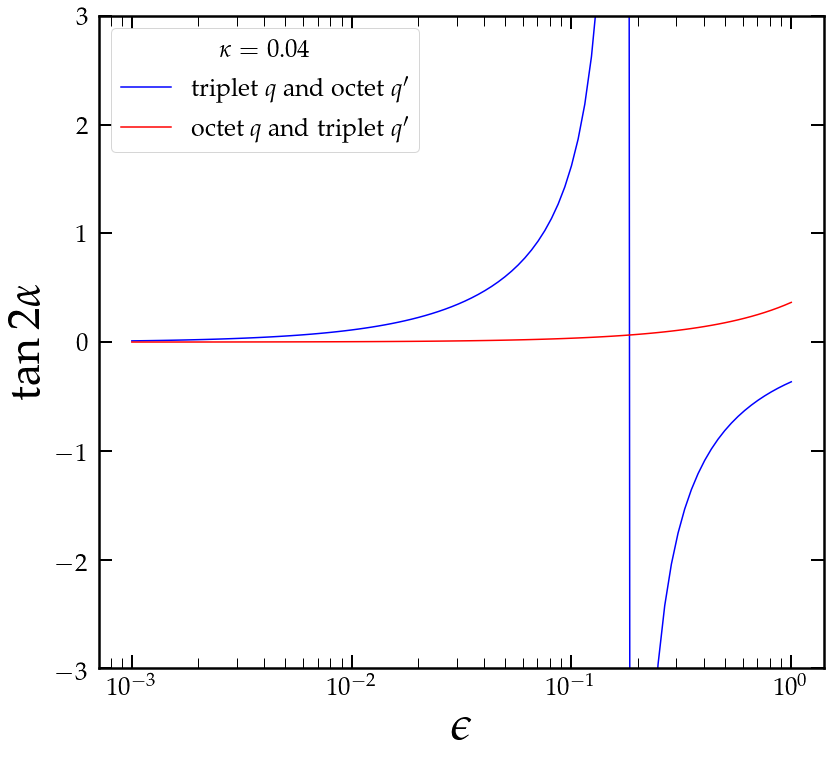

In [92]:
fig,ax = MySquarePlot(r'$\epsilon$',r'$\tan{2\alpha}$')
eps_vals = logspace(-3,0,100)

k = 0.04


AnomalyCoefficients = [0.5,3,3/2,13/2]
dm_sq,m1,m2,tan_2alpha = Parameters(1e10,eps_vals,k,AnomalyCoefficients)
plt.semilogx(eps_vals,tan_2alpha,'b-',label='triplet $q$ and octet $q^\prime$')


AnomalyCoefficients = [3,0.5,13/2,3/2]
dm_sq,m1,m2,tan_2alpha = Parameters(1e10,eps_vals,k,AnomalyCoefficients)
plt.semilogx(eps_vals,tan_2alpha,'r-',label='octet $q$ and triplet $q^\prime$')

plt.legend(title=r'$\kappa = 0.04$')
plt.ylim([-3,3])

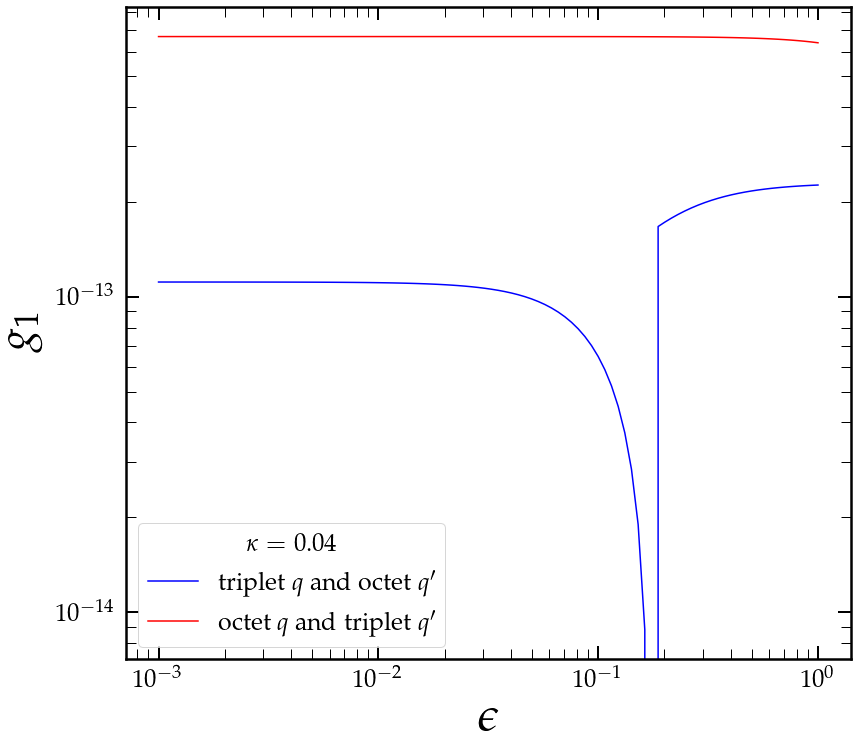

In [91]:
fig,ax = MySquarePlot(r'$\epsilon$',r'$g_1$')


k = 0.04


AnomalyCoefficients = [0.5,3,3/2,13/2]
m1,m2,g1,g2 = Couplings(1e10,eps_vals,k,AnomalyCoefficients)
plt.loglog(eps_vals,g1,'b-',label='triplet $q$ and octet $q^\prime$')

AnomalyCoefficients = [3,0.5,13/2,3/2]
m1,m2,g1,g2 = Couplings(1e10,eps_vals,k,AnomalyCoefficients)
plt.loglog(eps_vals,g1,'r-',label='octet $q$ and triplet $q^\prime$')

plt.legend(title=r'$\kappa = 0.04$')
